In [1]:
import nltk
import string
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import *
from nltk.corpus import stopwords
from wordcloud import WordCloud
from app_store_scraper import AppStore

In [2]:
# 1. Scrape the reviews from App Store
cdg = AppStore(country='sg', app_name='cdg-zig', app_id='954951647')
cdg.review(how_many=25000)

2022-08-15 15:12:38,911 [INFO] Base - Initialised: AppStore('sg', 'cdg-zig', 954951647)
2022-08-15 15:12:38,912 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/cdg-zig/id954951647
2022-08-15 15:12:44,039 [INFO] Base - [id:954951647] Fetched 360 reviews (360 fetched in total)
2022-08-15 15:12:49,568 [INFO] Base - [id:954951647] Fetched 660 reviews (660 fetched in total)
2022-08-15 15:12:54,926 [INFO] Base - [id:954951647] Fetched 1000 reviews (1000 fetched in total)
2022-08-15 15:13:00,218 [INFO] Base - [id:954951647] Fetched 1380 reviews (1380 fetched in total)
2022-08-15 15:13:05,690 [INFO] Base - [id:954951647] Fetched 1740 reviews (1740 fetched in total)
2022-08-15 15:13:08,618 [INFO] Base - [id:954951647] Fetched 1937 reviews (1937 fetched in total)


In [9]:
reviews = pd.DataFrame(np.array(cdg.reviews), columns=['review'])
ios_reviews = reviews.join(pd.DataFrame(reviews.pop('review').tolist()))
df_ios_reviews = ios_reviews.sort_values(by='date', ascending=False)
df_ios_reviews

,developerResponse,title,review,rating,userName,date,isEdited
199,NaN,Doesn’t let me enter locations,"When I try to choose a new destination, the ap...",2,hagha12,2022-08-13 08:15:21,False
403,NaN,Paylah deduction,Money was deducted from my paylah even though ...,1,newbie6157,2022-08-13 05:07:20,False
201,NaN,Great Taxi App,Book with ease at reasonable taxi rates and co...,4,jangwl,2022-08-13 03:53:05,False
213,NaN,App not working,Not able to click done. Seems like the done bu...,1,Reviewer4:35,2022-08-11 03:05:47,False
268,"{'id': 31410931, 'body': 'Dear Sir/Mdm, thank ...",Apps is not friendly use,"I want to change my old email for my receipt, ...",1,ttobingth,2022-08-10 05:36:31,False
...,...,...,...,...,...,...,...
1560,NaN,Great App!,"Love it, good job and pls keep it up!",5,Derrick Chua,2015-01-21 01:14:19,False
1237,NaN,Recommended taxi app,The way taxi apps should be:),5,The eternal optimist-TEO,2015-01-20 13:30:50,False
1700,NaN,New ComfortDelgro Booking App,Awesome...,5,clydewong hui,2015-01-20 08:03:26,False
883,NaN,Great app,"Faster, more stable, quite surprise when it sh...",5,Keith.dinh,2015-01-20 00:01:02,False


In [7]:
review_content_rating = df_ios_reviews[['title', 'review', 'rating', 'date']]
review_content_rating.head()

,title,review,rating,date
199,Doesn’t let me enter locations,"When I try to choose a new destination, the ap...",2,2022-08-13 08:15:21
403,Paylah deduction,Money was deducted from my paylah even though ...,1,2022-08-13 05:07:20
201,Great Taxi App,Book with ease at reasonable taxi rates and co...,4,2022-08-13 03:53:05
213,App not working,Not able to click done. Seems like the done bu...,1,2022-08-11 03:05:47
268,Apps is not friendly use,"I want to change my old email for my receipt, ...",1,2022-08-10 05:36:31


In [8]:
# review_content_rating['Summary_of_Issues'] = review_content_rating['title'].str.cat(review_content_rating['review'], sep='-')
review_content_rating['Summary_of_Issues'] = review_content_rating['review']
review_content_rating.head()

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_76105/2252479442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_content_rating['Summary_of_Issues'] = review_content_rating['review']


,title,review,rating,date,Summary_of_Issues
199,Doesn’t let me enter locations,"When I try to choose a new destination, the ap...",2,2022-08-13 08:15:21,"When I try to choose a new destination, the ap..."
403,Paylah deduction,Money was deducted from my paylah even though ...,1,2022-08-13 05:07:20,Money was deducted from my paylah even though ...
201,Great Taxi App,Book with ease at reasonable taxi rates and co...,4,2022-08-13 03:53:05,Book with ease at reasonable taxi rates and co...
213,App not working,Not able to click done. Seems like the done bu...,1,2022-08-11 03:05:47,Not able to click done. Seems like the done bu...
268,Apps is not friendly use,"I want to change my old email for my receipt, ...",1,2022-08-10 05:36:31,"I want to change my old email for my receipt, ..."
...,...,...,...,...,...
1560,Great App!,"Love it, good job and pls keep it up!",5,2015-01-21 01:14:19,"Love it, good job and pls keep it up!"
1237,Recommended taxi app,The way taxi apps should be:),5,2015-01-20 13:30:50,The way taxi apps should be:)
1700,New ComfortDelgro Booking App,Awesome...,5,2015-01-20 08:03:26,Awesome...
883,Great app,"Faster, more stable, quite surprise when it sh...",5,2015-01-20 00:01:02,"Faster, more stable, quite surprise when it sh..."


In [7]:
# 2. Filter date starting from '2022-05-01'
review_content_rating['date'] = pd.to_datetime(review_content_rating['date'], "%Y-%m-%d").dt.date
review_content_rating = review_content_rating.set_index('date')

startdate = pd.to_datetime("2022-5-1").date()

filter_reviews = review_content_rating.loc[:startdate]
filter_reviews.tail()

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/544544632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_content_rating['date'] = pd.to_datetime(review_content_rating['date'], "%Y-%m-%d").dt.date


,title,review,rating,Summary_of_Issues
date,,,,
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,So many taxi in singapore also hard to get tax...
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,This App is bad compared to the old Comfort ap...
2022-05-03,Kosh Yeo,Very good apps more to improve,5,Very good apps more to improve
2022-05-03,stupid name,guys … brainstorming session…. we need a name ...,2,guys … brainstorming session…. we need a name ...
2022-05-02,Disappointed with new logo,It’s a shame to change logo to z. \nRussian tr...,1,It’s a shame to change logo to z. \nRussian tr...


In [12]:
# 3. Add 'positive/negative' label
df = filter_reviews

# Rating/Score 1-4: negative, rating/score 5: positive
def label_func(rating):
    if rating <= 4:
        return 'negative'
    else:
        return 'positive'
    
df['Label'] = df['rating'].apply(label_func)
df

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/4217939640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['rating'].apply(label_func)


,title,review,rating,Summary_of_Issues,Label
date,,,,,
2022-08-09,Chase to the bottom,Your service and your app are consistently deg...,1,Your service and your app are consistently deg...,negative
2022-08-07,Auto cancelled by itself,Pls fix the apps. This is the 2nd time I booke...,1,Pls fix the apps. This is the 2nd time I booke...,negative
2022-08-07,Not friendly to use,Tried to book but couldn’t do advance booking ...,1,Tried to book but couldn’t do advance booking ...,negative
2022-08-06,Cannot view text while typing feedback !,The app has a feedback section but it’s comple...,2,The app has a feedback section but it’s comple...,negative
2022-08-06,Lousy App,"Deleted and re-download App numerous times, st...",1,"Deleted and re-download App numerous times, st...",negative
...,...,...,...,...,...
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,So many taxi in singapore also hard to get tax...,negative
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,This App is bad compared to the old Comfort ap...,negative
2022-05-03,Kosh Yeo,Very good apps more to improve,5,Very good apps more to improve,positive


In [13]:
# 4. Data Cleaning 

# 4-1) Convert words into lowercase

df["Summary_of_Issues"] = df["Summary_of_Issues"].str.lower() 

df 

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/3734962086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Summary_of_Issues"] = df["Summary_of_Issues"].str.lower()


,title,review,rating,Summary_of_Issues,Label
date,,,,,
2022-08-09,Chase to the bottom,Your service and your app are consistently deg...,1,your service and your app are consistently deg...,negative
2022-08-07,Auto cancelled by itself,Pls fix the apps. This is the 2nd time I booke...,1,pls fix the apps. this is the 2nd time i booke...,negative
2022-08-07,Not friendly to use,Tried to book but couldn’t do advance booking ...,1,tried to book but couldn’t do advance booking ...,negative
2022-08-06,Cannot view text while typing feedback !,The app has a feedback section but it’s comple...,2,the app has a feedback section but it’s comple...,negative
2022-08-06,Lousy App,"Deleted and re-download App numerous times, st...",1,"deleted and re-download app numerous times, st...",negative
...,...,...,...,...,...
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,so many taxi in singapore also hard to get tax...,negative
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,this app is bad compared to the old comfort ap...,negative
2022-05-03,Kosh Yeo,Very good apps more to improve,5,very good apps more to improve,positive


In [14]:
# 4-2) Remove number and punctuation mark
df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
df['Cleaned_reviews'] = df['Cleaned_reviews'].str.replace('\d+', ' ')
df

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/1974911576.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/1974911576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_reviews'] = df['Summary_of_Issues'].str.replace(r'[^\w\s]+', ' ')
/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/1974911576.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_reviews'] = df['Cleaned_reviews'].str.replace('\d+', ' ')
/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn

,title,review,rating,Summary_of_Issues,Label,Cleaned_reviews
date,,,,,,
2022-08-09,Chase to the bottom,Your service and your app are consistently deg...,1,your service and your app are consistently deg...,negative,your service and your app are consistently deg...
2022-08-07,Auto cancelled by itself,Pls fix the apps. This is the 2nd time I booke...,1,pls fix the apps. this is the 2nd time i booke...,negative,pls fix the apps this is the nd time i booke...
2022-08-07,Not friendly to use,Tried to book but couldn’t do advance booking ...,1,tried to book but couldn’t do advance booking ...,negative,tried to book but couldn t do advance booking ...
2022-08-06,Cannot view text while typing feedback !,The app has a feedback section but it’s comple...,2,the app has a feedback section but it’s comple...,negative,the app has a feedback section but it s comple...
2022-08-06,Lousy App,"Deleted and re-download App numerous times, st...",1,"deleted and re-download app numerous times, st...",negative,deleted and re download app numerous times st...
...,...,...,...,...,...,...
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,so many taxi in singapore also hard to get tax...,negative,so many taxi in singapore also hard to get tax...
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,this app is bad compared to the old comfort ap...,negative,this app is bad compared to the old comfort ap...
2022-05-03,Kosh Yeo,Very good apps more to improve,5,very good apps more to improve,positive,very good apps more to improve


In [15]:
# 4-3) Word tokenization
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Cleaned_reviews']), axis=1)
df
 
# Length of reviews
df['reviews_length'] = df.apply(lambda row: len(row['tokenized_reviews']), axis=1)
df

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/1620069006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Cleaned_reviews']), axis=1)
/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/1620069006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_length'] = df.apply(lambda row: len(row['tokenized_reviews']), axis=1)


,title,review,rating,Summary_of_Issues,Label,Cleaned_reviews,tokenized_reviews,reviews_length
date,,,,,,,,
2022-08-09,Chase to the bottom,Your service and your app are consistently deg...,1,your service and your app are consistently deg...,negative,your service and your app are consistently deg...,"[your, service, and, your, app, are, consisten...",47
2022-08-07,Auto cancelled by itself,Pls fix the apps. This is the 2nd time I booke...,1,pls fix the apps. this is the 2nd time i booke...,negative,pls fix the apps this is the nd time i booke...,"[pls, fix, the, apps, this, is, the, nd, time,...",46
2022-08-07,Not friendly to use,Tried to book but couldn’t do advance booking ...,1,tried to book but couldn’t do advance booking ...,negative,tried to book but couldn t do advance booking ...,"[tried, to, book, but, couldn, t, do, advance,...",37
2022-08-06,Cannot view text while typing feedback !,The app has a feedback section but it’s comple...,2,the app has a feedback section but it’s comple...,negative,the app has a feedback section but it s comple...,"[the, app, has, a, feedback, section, but, it,...",26
2022-08-06,Lousy App,"Deleted and re-download App numerous times, st...",1,"deleted and re-download app numerous times, st...",negative,deleted and re download app numerous times st...,"[deleted, and, re, download, app, numerous, ti...",28
...,...,...,...,...,...,...,...,...
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,so many taxi in singapore also hard to get tax...,negative,so many taxi in singapore also hard to get tax...,"[so, many, taxi, in, singapore, also, hard, to...",23
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,this app is bad compared to the old comfort ap...,negative,this app is bad compared to the old comfort ap...,"[this, app, is, bad, compared, to, the, old, c...",167
2022-05-03,Kosh Yeo,Very good apps more to improve,5,very good apps more to improve,positive,very good apps more to improve,"[very, good, apps, more, to, improve]",6


In [16]:
# 4-4) Remove stopwords

def remove_english_stopwords_func(text):
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)
    return text


df['Nostopwords_reviews'] = df['tokenized_reviews'].apply(remove_english_stopwords_func)
df

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/3914445207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nostopwords_reviews'] = df['tokenized_reviews'].apply(remove_english_stopwords_func)


,title,review,rating,Summary_of_Issues,Label,Cleaned_reviews,tokenized_reviews,reviews_length,Nostopwords_reviews
date,,,,,,,,,
2022-08-09,Chase to the bottom,Your service and your app are consistently deg...,1,your service and your app are consistently deg...,negative,your service and your app are consistently deg...,"[your, service, and, your, app, are, consisten...",47,service app consistently degrading app constan...
2022-08-07,Auto cancelled by itself,Pls fix the apps. This is the 2nd time I booke...,1,pls fix the apps. this is the 2nd time i booke...,negative,pls fix the apps this is the nd time i booke...,"[pls, fix, the, apps, this, is, the, nd, time,...",46,pls fix apps nd time booked taxi auto cancelle...
2022-08-07,Not friendly to use,Tried to book but couldn’t do advance booking ...,1,tried to book but couldn’t do advance booking ...,negative,tried to book but couldn t do advance booking ...,"[tried, to, book, but, couldn, t, do, advance,...",37,tried book advance booking days ahead yet driv...
2022-08-06,Cannot view text while typing feedback !,The app has a feedback section but it’s comple...,2,the app has a feedback section but it’s comple...,negative,the app has a feedback section but it s comple...,"[the, app, has, a, feedback, section, but, it,...",26,app feedback section completely covered keyboa...
2022-08-06,Lousy App,"Deleted and re-download App numerous times, st...",1,"deleted and re-download app numerous times, st...",negative,deleted and re download app numerous times st...,"[deleted, and, re, download, app, numerous, ti...",28,deleted download app numerous times still show...
...,...,...,...,...,...,...,...,...,...
2022-05-04,Useless,So many taxi in singapore also hard to get tax...,1,so many taxi in singapore also hard to get tax...,negative,so many taxi in singapore also hard to get tax...,"[so, many, taxi, in, singapore, also, hard, to...",23,many taxi singapore also hard get taxi later c...
2022-05-04,App not working as it should be,This App is bad compared to the old Comfort ap...,2,this app is bad compared to the old comfort ap...,negative,this app is bad compared to the old comfort ap...,"[this, app, is, bad, compared, to, the, old, c...",167,app bad compared old comfort app twice encount...
2022-05-03,Kosh Yeo,Very good apps more to improve,5,very good apps more to improve,positive,very good apps more to improve,"[very, good, apps, more, to, improve]",6,good apps improve


In [17]:
# 4-5) Devided by label
positive_review = df[(df['Label'] == 'positive')]['Nostopwords_reviews']
negative_review = df[(df['Label'] == 'negative')]['Nostopwords_reviews']

In [18]:
# 5. Normalise word (reduce words to root or root form)

def norm_lemm_v_a_n_r_func(text):
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    words3 = word_tokenize(text2)
    text3 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='n') for word in words3])
    words4 = word_tokenize(text3)
    text4 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='r') for word in words4])
    return text4

# Normalize the whole reviews
Nostopwords_reviews = df['Nostopwords_reviews'].str.cat(sep=' ')
Normalized_review = norm_lemm_v_a_n_r_func(Nostopwords_reviews)

# Normalize postive reviews
text_corpus_positive_review = positive_review.str.cat(sep=' ')
Normalized_positive_review = norm_lemm_v_a_n_r_func(text_corpus_positive_review)

# Normalize negative reviews
text_corpus_negative_review = negative_review.str.cat(sep=' ')
Normalized_negative_review = norm_lemm_v_a_n_r_func(text_corpus_negative_review)

In [20]:
# 6. Remove specific words
def multiple_word_remove_func(text, words_remove_list):
    words_to_remove_list = words_remove_list
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

words_remove_list = ['app', 'apps', 'booking', 'cab', 'taxi', 'book', 'cdg', 'one', 'even', 'take', 'many', 'get', 'also', 'go', 'make', 'still', 'use', 'keep', 'please', 'try', 'always', 'find', 'say', 'need']

# 6-1) Remove specific words from the whole reviews
remove_word_review = multiple_word_remove_func(Normalized_review, words_remove_list)
remove_word_review

'service consistently degrade constantly crash assign know nothing assignment company singapore could proud second rate operation become disillusion pls fix nd time auto cancel reason receive sm min driver call inform arrive show detail advance day ahead yet driver assign come pick current time advance cancel immediately feedback section completely cover keyboard type feedback see type delete download numerous time show type vehicle send email feedback nothing do great first recent update miss order drive away search never time till cancel hard full bug inconvenient u work parent drop kid school without add another destination time driver reprimand cause understand price different n really feel driver earn low covid period give accurate information useful area scan qr code street hail small hard aim sometimes select destination stick continue cancel search progress result min attempt two row cancel wait way reach front block waste min life addition feedback mechanism difficult iphone t

In [21]:
# 6-2) Remove specific words from the positive reviews
remove_word_positive_review = multiple_word_remove_func(Normalized_positive_review , words_remove_list)
remove_word_positive_review

'great amaze driver friendly kindly safety driver thank nice meet like much good able quick like allow change payment method add promo trip start allow comfort fleet experience driver destination without much hassle know singapore road heart rarely map know road le congest part day accordingly plan trip instinct travel cautious though thank milind fast efficient way easy improve provision information driver cancel trip could tell lot information situation private hire car prompt accept request rarely cancel experience wrt service nice wish would give promotion cod well far never receive power thank open tool good driver thank good improve'

In [22]:
# 6-3) Remove specific words from the negative reviews
remove_word_negative_review = multiple_word_remove_func(Normalized_negative_review, words_remove_list)
remove_word_negative_review

'service consistently degrade constantly crash assign know nothing assignment company singapore could proud second rate operation become disillusion pls fix nd time auto cancel reason receive sm min driver call inform arrive show detail advance day ahead yet driver assign come pick current time advance cancel immediately feedback section completely cover keyboard type feedback see type delete download numerous time show type vehicle send email feedback nothing do great first recent update miss order drive away search never time till cancel hard full bug inconvenient u work parent drop kid school without add another destination time driver reprimand cause understand price different n really feel driver earn low covid period give accurate information useful area scan qr code street hail small hard aim sometimes select destination stick continue cancel search progress result min attempt two row cancel wait way reach front block waste min life addition feedback mechanism difficult iphone t

In [23]:
# 7. Count word frequency
def Word_frequency_func(text):
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Word_frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Word_frequency', ascending=False)
    
    return df_fdist

# 7-1) Count word frequency for the whole reviews
df_Word_frequency = Word_frequency_func(remove_word_review)
df_Word_frequency.head(30)

,Word,Word_frequency
28,driver,67
21,time,47
59,update,40
186,server,33
23,cancel,32
208,comfort,32
32,show,28
135,location,27
114,wait,25
156,bad,24


In [24]:
# 7-2) Count word frequency for the postive reviews
df_positive_Word_frequency = Word_frequency_func(remove_word_positive_review)
df_positive_Word_frequency.head(30)

,Word,Word_frequency
2,driver,5
6,thank,4
11,good,3
20,trip,3
52,cancel,2
24,experience,2
30,road,2
32,rarely,2
14,allow,2
51,information,2


In [25]:
# 7-3) Count word frequency for the negative review
df_negative_Word_frequency = Word_frequency_func(remove_word_negative_review)
df_negative_Word_frequency.head(30)

,Word,Word_frequency
28,driver,62
21,time,47
59,update,40
186,server,33
208,comfort,31
23,cancel,30
32,show,28
135,location,27
114,wait,25
187,connection,24


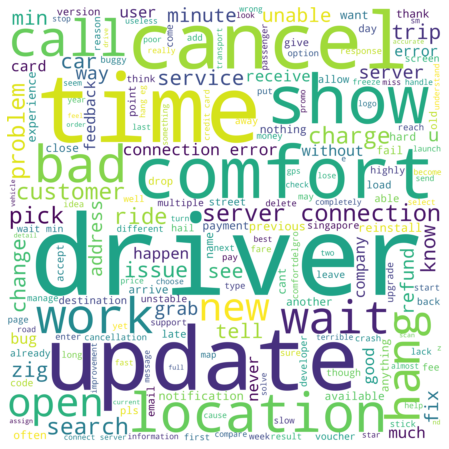

In [26]:
# .8 Word cloud
def wordcloud_func(words):
    wordcloud = WordCloud(width = 3000, height = 3000,
                      background_color = 'white',
                      min_font_size = 10).generate(words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
# 8-1) Word cloud for all reviews
all_review_wordcloud = wordcloud_func(remove_word_review)

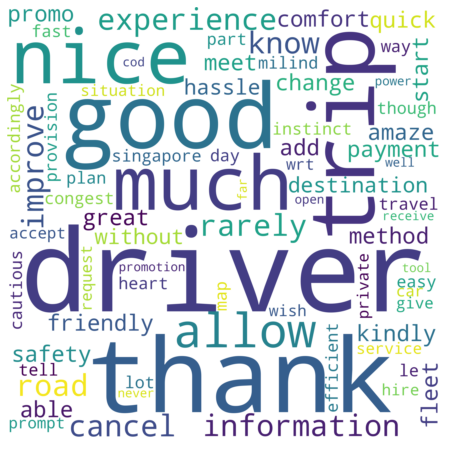

In [27]:
# 8-2) Word cloud for positive reviews
positive_review_wordcloud = wordcloud_func(remove_word_positive_review)

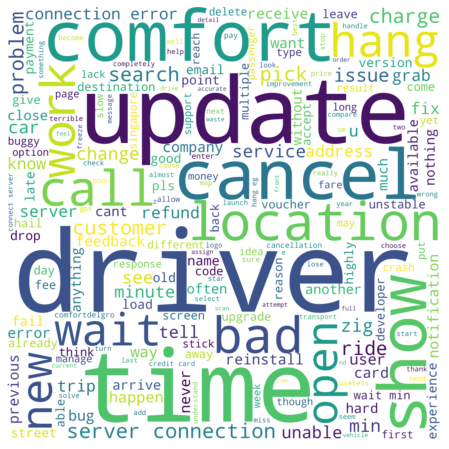

In [28]:
# 8-3) Word cloud for negative reviews
negative_review_wordcloud = wordcloud_func(remove_word_negative_review)

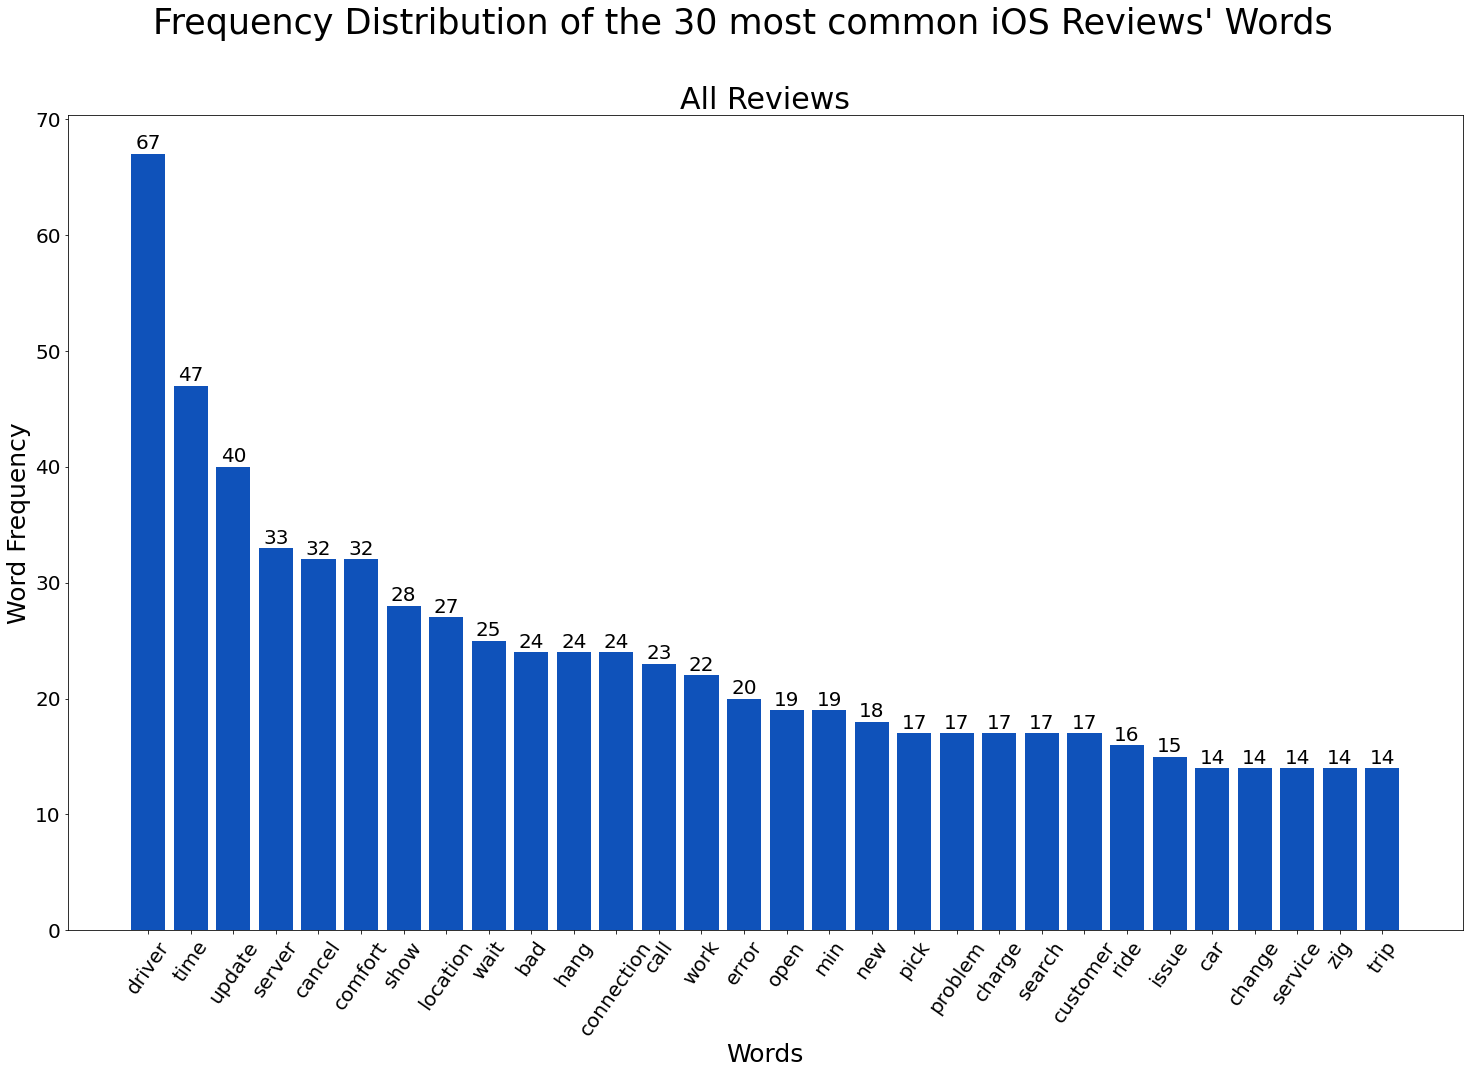

In [32]:
# 9. Bar chart for word frequency
def word_freq_bar_func(X, Y, width, color, title):
    fig = plt.figure(figsize=(25, 15))
    fig.patch.set_facecolor('white')
    plt.bar(X, Y, 0.8, color = color)
    plt.xlabel('Words', fontsize=25)
    plt.ylabel('Word Frequency', fontsize=25)
    plt.suptitle("Frequency Distribution of the 30 most common iOS Reviews' Words", fontsize=35)
    plt.title(title, fontsize=30)
    
    # text annotation
    for a,b in zip(X, Y):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom', fontsize=20)
    
    # Change x_label's direction
    plt.tick_params(labelsize=20)
    plt.xticks(rotation=55) # Or change rotation=45 to rotation='vertical'
    plt.show()

# 9-1) Word frequency bar chart for all reviews
df_most_common_30_words = df_Word_frequency.head(30)
X1 = df_most_common_30_words['Word']
Y1 = df_most_common_30_words['Word_frequency']
color1 = '#0F52BA'
title1 = "All Reviews"
All_review_bar = word_freq_bar_func(X1, Y1, 0.8, color1, title1)

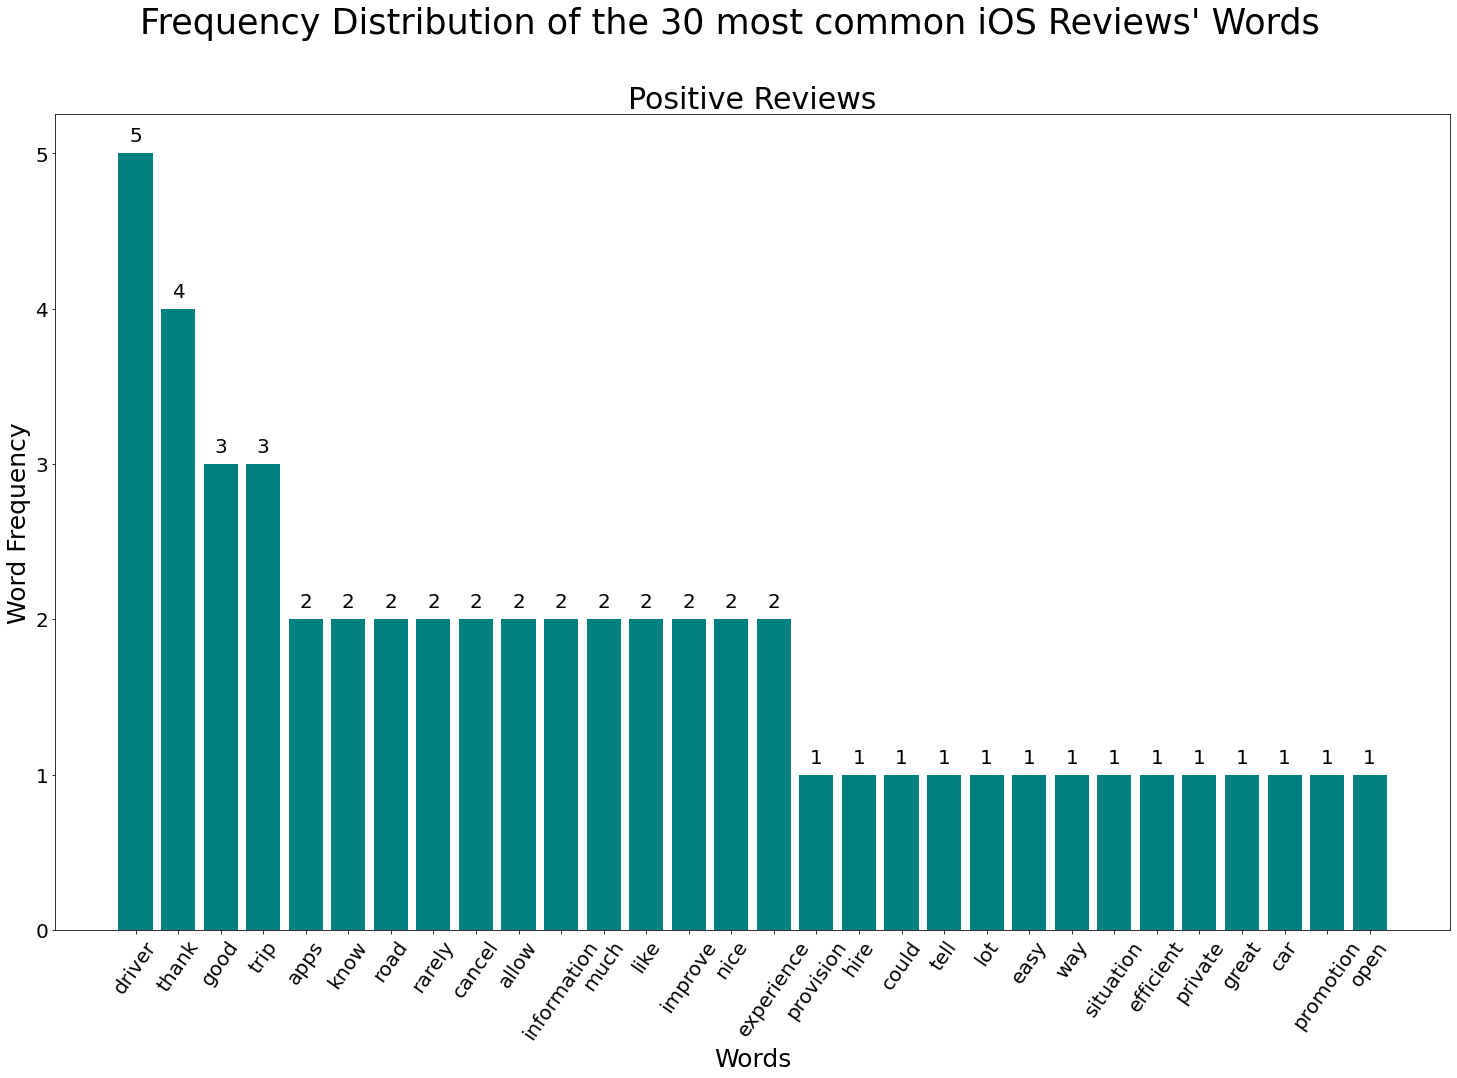

In [33]:
# 9-2) Word frequency bar chart for positive reviews
df_positive_most_30_common_words = Word_frequency_func(remove_word_positive_review).head(30)
X2 = df_positive_most_30_common_words['Word']
Y2 = df_positive_most_30_common_words['Word_frequency']
color2 = '#008080'
title2 = "Positive Reviews"
All_review_bar = word_freq_bar_func(X2, Y2, 0.8, color2, title2)

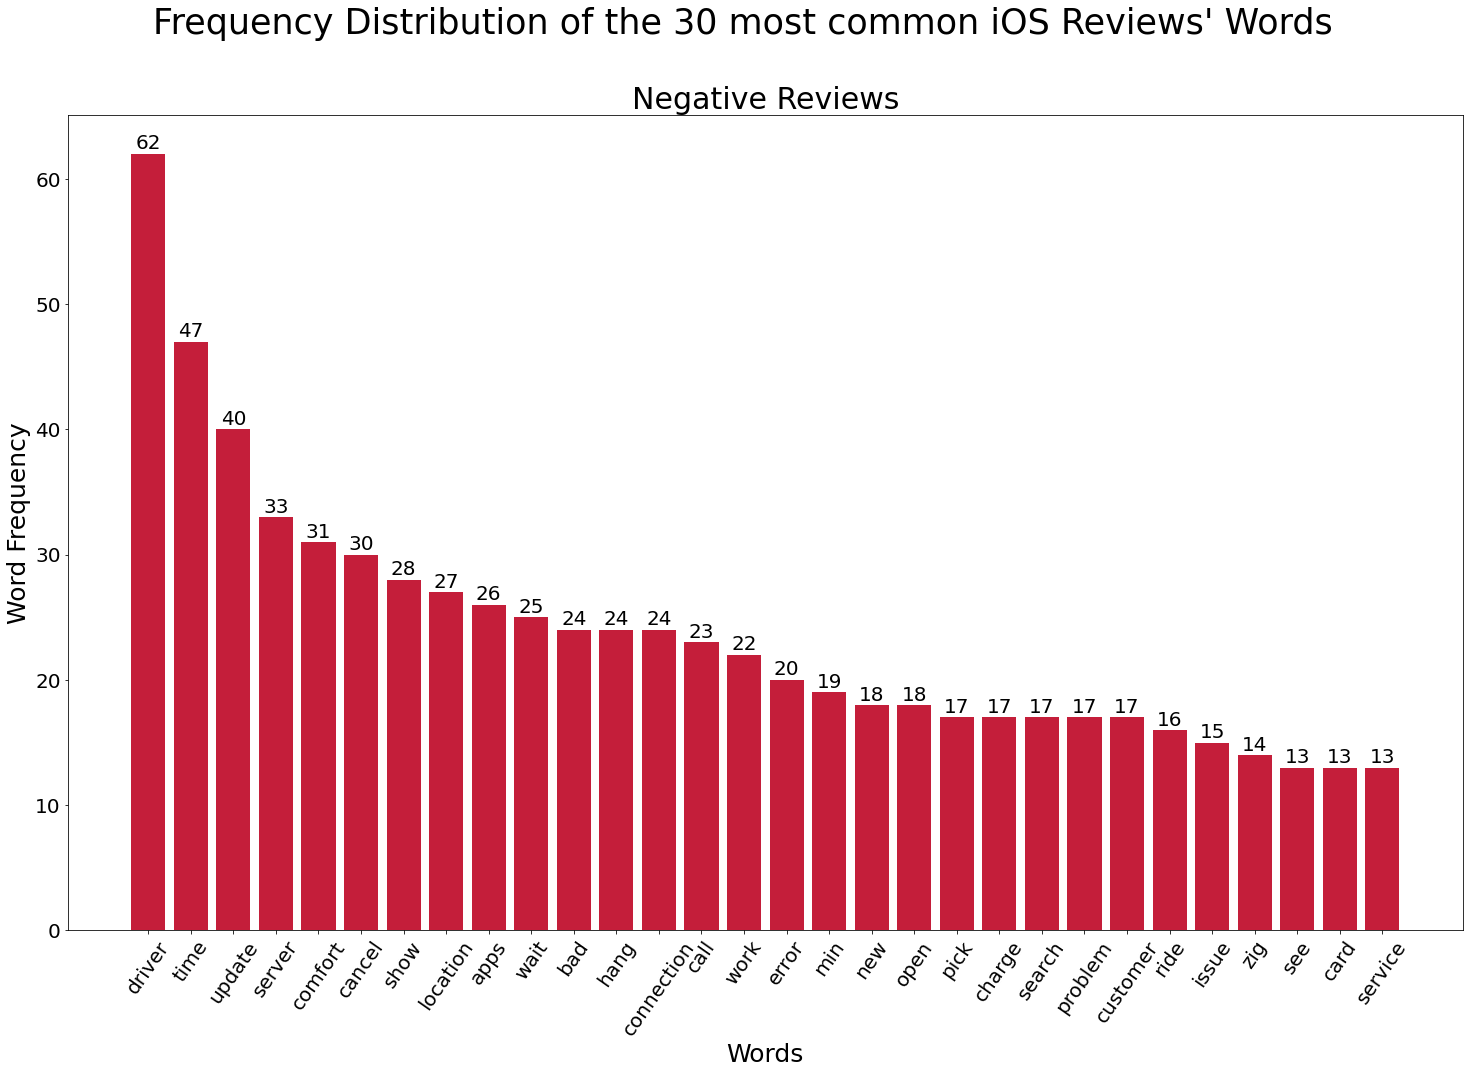

In [34]:
# 9-3) Word frequency bar chart for negative reviews
df_negative_most_30_common_words = Word_frequency_func(remove_word_negative_review).head(30)
X3 = df_negative_most_30_common_words['Word']
Y3 = df_negative_most_30_common_words['Word_frequency']
color3 = '#C41E3A'
title3 = "Negative Reviews"
All_review_bar = word_freq_bar_func(X3, Y3, 0.8, color3, title3)

In [35]:
# 10. Count the daily & total number for reviews
review_count = filter_reviews

# 10-1) Daily number for reviews
# 10-1-1) Daily number for all reviews
df_count_all_daily = pd.DataFrame({'Count_of_review':review_count.groupby(['date'])["Summary_of_Issues"].count()})
df_count_all_daily = df_count_all_daily.sort_values(by = 'date', ascending = False)
df_count_all_daily

,Count_of_review
date,
2022-08-09,1
2022-08-07,2
2022-08-06,3
2022-08-05,1
2022-08-04,1
...,...
2022-05-06,3
2022-05-05,10
2022-05-04,2


In [37]:
# 10-1-2) Daily number for positive/negative reviews
review_count['Label'] = review_count['rating'].apply(label_func)

df_count_label_daily = pd.DataFrame({'Count_of_review_label':review_count.groupby(['date','Label'])["Summary_of_Issues"].count()})
df_count_label_daily = df_count_label_daily.sort_values(by = 'date', ascending = False)
df_count_label_daily

/var/folders/vm/2qwzk39s5s5d1352z57dndwm0000gn/T/ipykernel_41882/2792099642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_count['Label'] = review_count['rating'].apply(label_func)


,,Count_of_review_label
date,Label,
2022-08-09,negative,1
2022-08-07,negative,2
2022-08-06,negative,3
2022-08-05,negative,1
2022-08-04,negative,1
...,...,...
2022-05-05,positive,1
2022-05-04,negative,2
2022-05-03,positive,1


In [38]:
# 10-2) Total number for reviews
# 10-2-1) Total number for all reviews
df_count_all_total = pd.DataFrame({"Name":"All reviews",
                                   "Count_of_review":review_count['Summary_of_Issues'].count()}, index=[0])
df_count_all_total

,Name,Count_of_review
0,All reviews,183


In [39]:
# 10-2-2) Total number for positive/negative reviews
df_count_label_total = pd.DataFrame({'Count_of_label':review_count.groupby('Label')["Summary_of_Issues"].count()})
df_count_label_total

,Count_of_label
Label,
negative,169
positive,14


In [40]:
# 11. Count the daily & total number for star-rating (1-5)
# 11-1) Daily number for star-rating
df_count_rating_daily = pd.DataFrame({"Count_of_rating":review_count.groupby(['date', 'rating'])['Summary_of_Issues'].count()})
df_count_rating_daily = df_count_rating_daily.sort_values(by = 'date', ascending = False)
df_count_rating_daily

Count_of_rating
date       rating                 
2022-08-09 1                     1
2022-08-07 1                     2
2022-08-06 2                     1
           1                     2
2022-08-05 1                     1
...                            ...
2022-05-04 2                     1
           1                     1
2022-05-03 5                     1
           2                     1
2022-05-02 1                     1

[93 rows x 1 columns]

In [41]:
# 11-2) Total number for star-rating
df_count_rating_total = pd.DataFrame({"Count_of_rating":review_count.groupby('rating')["Summary_of_Issues"].count()})
df_count_rating_total

,Count_of_rating
rating,
1,136
2,15
3,13
4,5
5,14


In [53]:
# 12. Check review edited history
# df_count_user = pd.DataFrame({"count": df_ios_reviews.groupby('userName')['review'].count() })
# df_count_user = df_count_user.sort_values(by='count', ascending=False)
# df_count_user

df_ios_reviews.loc[df_ios_reviews['isEdited'] == True]

,developerResponse,userName,date,title,isEdited,review,rating
211,"{'id': 28412094, 'body': 'Dear Sir/Mdm, we apo...",MaxFedUp,2022-05-10 23:04:47,Refresh App Makes No Difference,True,"Even with the refresh apps, it has not made an...",2
367,"{'id': 19149981, 'body': 'Dear Sir/Mdm, we hav...",nyborjare,2022-05-07 07:52:01,Problem with server connection,True,This is a frequent problem. Hope that it can b...,1
479,"{'id': 24788204, 'body': 'Dear Sir/Mdm, thank ...",ywc22,2022-05-07 07:12:35,App does not work,True,Server connection issue,1
186,"{'id': 6405590, 'body': 'Dear Sir/Mdm, thank y...",Daniel Zeke,2022-05-07 07:12:31,What is going on? Terrible upgrade,True,"New app is TERRIBLE! What happened? Firstly,...",1
345,"{'id': 23920015, 'body': 'Dear Sir/Mdm, we are...",Fiqyyyyyyy,2022-05-04 23:43:32,Useless,True,So many taxi in singapore also hard to get tax...,1
...,...,...,...,...,...,...,...
669,"{'id': 6344931, 'body': 'Dear Sir/Mdm, thank y...",=abelle=,2018-12-14 03:05:58,HORRIBLE. just bring the old version BACK!,True,"i managed to start the app after deleting, res...",1
863,"{'id': 6328848, 'body': 'Dear Sir/Mdm, thank y...",taiwancat,2018-12-12 23:41:12,poor user exp worse than previous version,True,this new version has a lot of issues\n1. when ...,1
730,"{'id': 6244579, 'body': 'Dear Sir/Mdm, thank ...",Pyhs,2018-12-11 10:00:35,New app feels like a beta app,True,New app is very hard to navigate. The previous...,1
1463,"{'id': 6307305, 'body': 'Dear Sir/Mdm, thank y...",praches1031,2018-12-11 09:45:24,New December update,True,The update released 9 hours ago on dec. 10th i...,1
